# *** *** *** *** *** *** *** *** *** PRODIGY INTERNSHIP *** *** *** *** *** *** *** *** 

## MACHINE_LEARNING_PROJECT_TASK# 03 :-"CATS AND DOGS USING SVM"

# IMPORT LIBRARIES 

In [24]:
import numpy as np
import sys
import tensorflow as tf
import os
import sys
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# basic librareis
import zipfile
import glob
import os
import pandas as pd
import numpy as np
from PIL import Image


# plotting and visualizations
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import missingno as msno
%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px

In [25]:
import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [26]:
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25000 number of images in directory.


In [27]:
IMAGE_FOLDER_PATH = "../working/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)


In [28]:
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [29]:
dataset.head()


,image_path,target
0,../working/train/dog.8428.jpg,dog
1,../working/train/cat.7837.jpg,cat
2,../working/train/dog.5968.jpg,dog
3,../working/train/cat.546.jpg,cat
4,../working/train/cat.449.jpg,cat


In [30]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25000
target
dog    12500
cat    12500
Name: count, dtype: int64


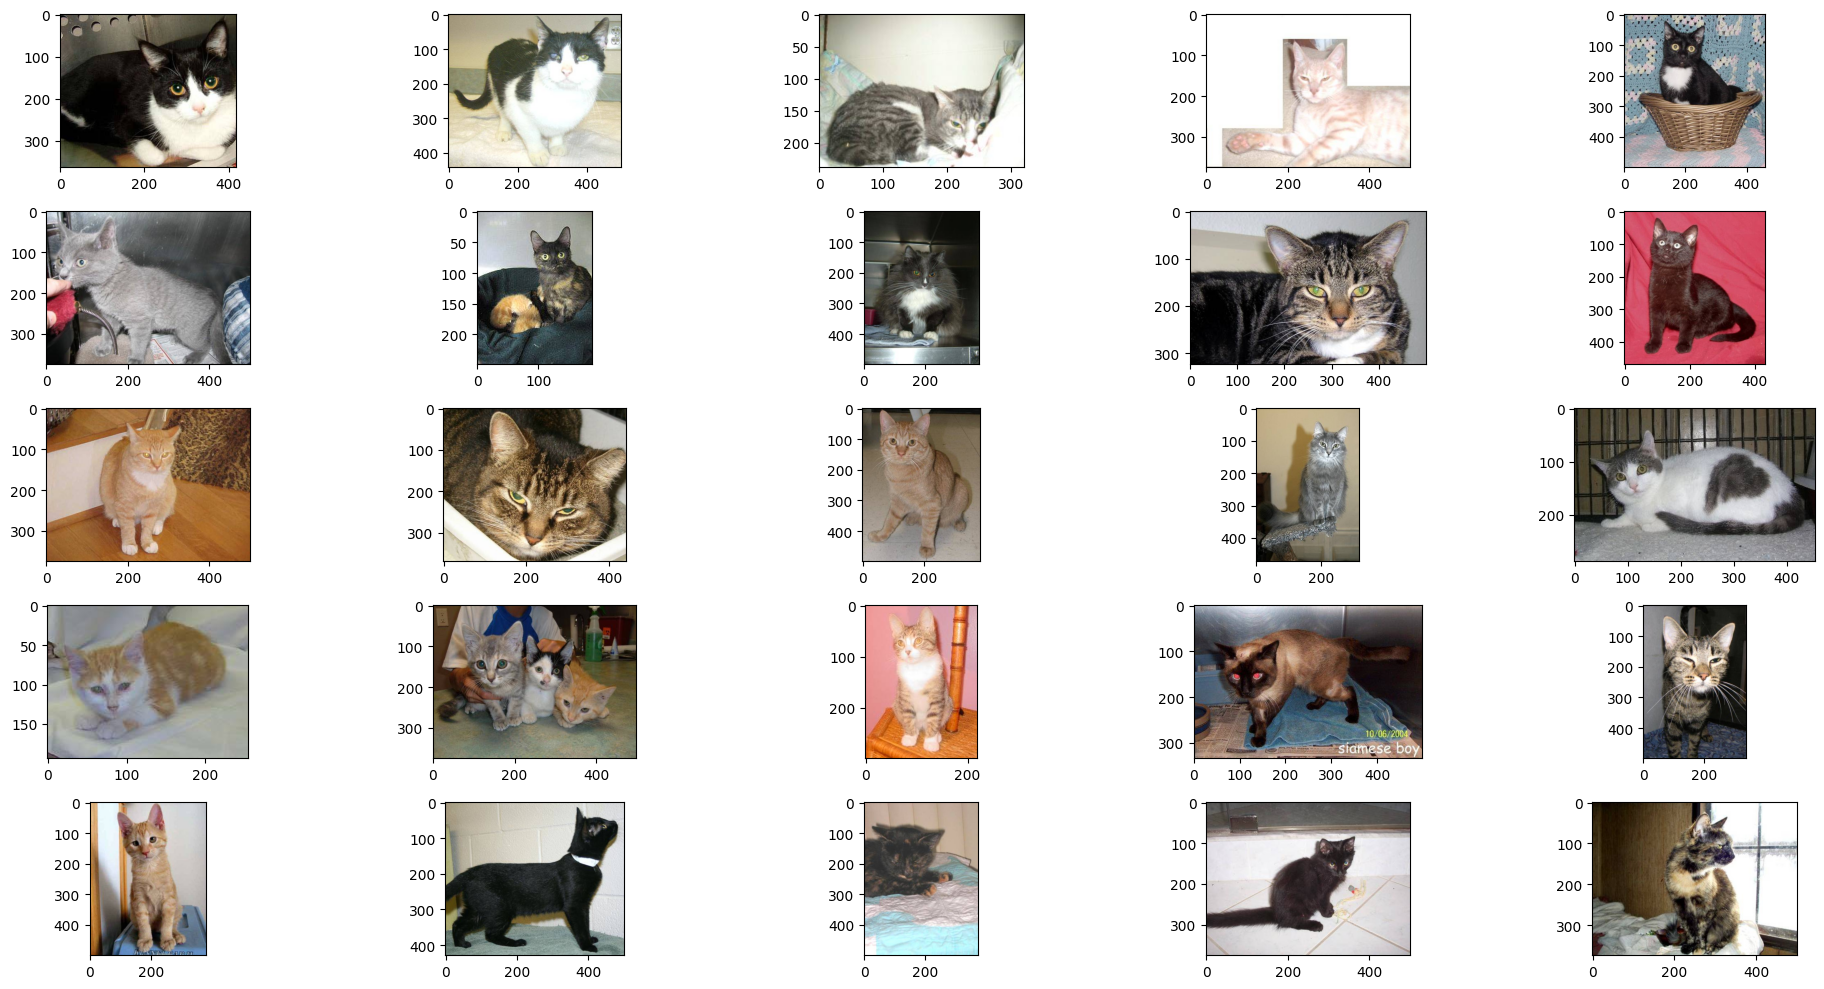

In [32]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

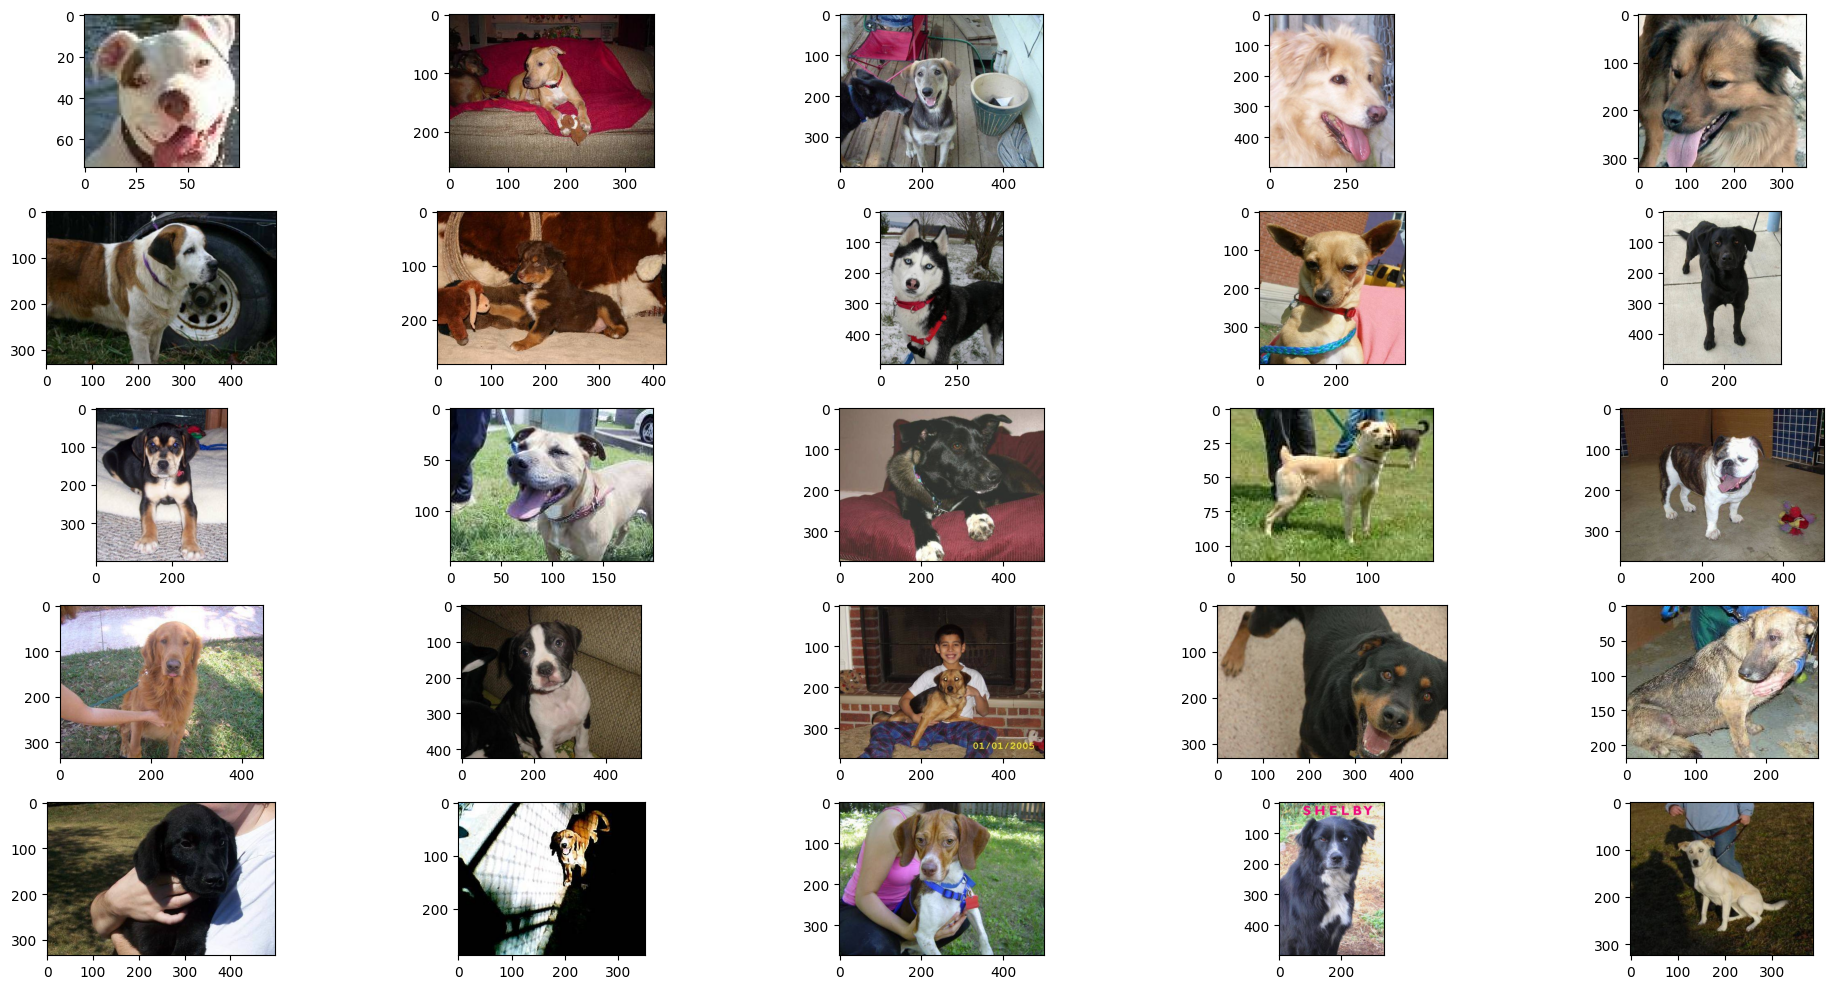

In [33]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

In [34]:
train, test_val = train_test_split(dataset, test_size=0.2, stratify=dataset['target'], random_state=20)
test, val = train_test_split(test_val, test_size=0.5,  stratify=test_val['target'], random_state=20)

In [35]:
train.shape, test_val.shape


((20000, 2), (5000, 2))

In [36]:
target_distribution =test['target'].value_counts()
target_distribution.head(10)

target
cat    1250
dog    1250
Name: count, dtype: int64

In [45]:
print('train set distribution:\n',train['target'].value_counts())
print('\nvalid set distribution:\n',test['target'].value_counts())
print()

plt.figure(figsize=(10,5))
fig = px.pie(target_distribution.head(10), values=target_distribution.head(10), names=target_distribution.head(10).index, hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart', font_size=15, title_x=0.45, annotations=[dict(text='Cat vs Dog', font_size=18, showarrow=False, height=800, width=700)])
fig.update_traces(textfont_size=15, textinfo='percent')
fig.show()


train set distribution:
 target
dog    10000
cat    10000
Name: count, dtype: int64

valid set distribution:
 target
cat    1250
dog    1250
Name: count, dtype: int64



<Figure size 1000x500 with 0 Axes>

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator



In [50]:
FILTER_SIZE = 3
NUM_FILTERS = 32
INPUT_SIZE = 32
MAXPOOL_SIZE = 2
BATCH_SIZE = 16
STEPS_PER_EPOCH = 20000//BATCH_SIZE
EPOCHS = 15

In [51]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (INPUT_SIZE,INPUT_SIZE,3),kernel_regularizer=tf.keras.regularizers.l2(0.01), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE,MAXPOOL_SIZE)))

model.add(Conv2D(32,(3,3), input_shape = (INPUT_SIZE,INPUT_SIZE,3),kernel_regularizer=tf.keras.regularizers.l2(0.01), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE,MAXPOOL_SIZE)))


model.add(Flatten())
model.add(Dense(units=128,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

aug_gen = ImageDataGenerator(rescale = 1./255)
                               
                             
training_set = aug_gen.flow_from_dataframe(train, x_col="image_path",
                                                     y_col="target",target_size = (32,32),
                                                          batch_size = 16,class_mode='binary')
# Preprocessing the Test set
test_data_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_data_generator.flow_from_dataframe(test,x_col="image_path",
                                                     y_col="target",target_size = (32, 32),
                                            batch_size = 16,
                                            class_mode = 'binary')
                                           
model.summary()


Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=5, monitor='val_loss', min_lr=0.00001)
checkpoint_cb = ModelCheckpoint('model.h5', save_best_only=True)

callbacks = [earlystop_cb, reduce_lr_cb, checkpoint_cb]

In [53]:
r=model.fit(x=training_set,validation_data =test_set,steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose = 1,callbacks=callbacks)


Epoch 1/15
1250/1250 [==============================] - 40s 24ms/step - loss: 0.7156 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/15
   4/1250 [..............................] - ETA: 27s - loss: 0.6936 - accuracy: 0.5156

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



1250/1250 [==============================] - 29s 23ms/step - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/15
1250/1250 [==============================] - 29s 23ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/15
1250/1250 [==============================] - 29s 23ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/15
1250/1250 [==============================] - 29s 23ms/step - loss: 0.6932 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/15
1250/1250 [==============================] - 29s 23ms/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/15
1250/1250 [==============================] - 29s 23ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 8/15
1250/1250 [==============================] - 2

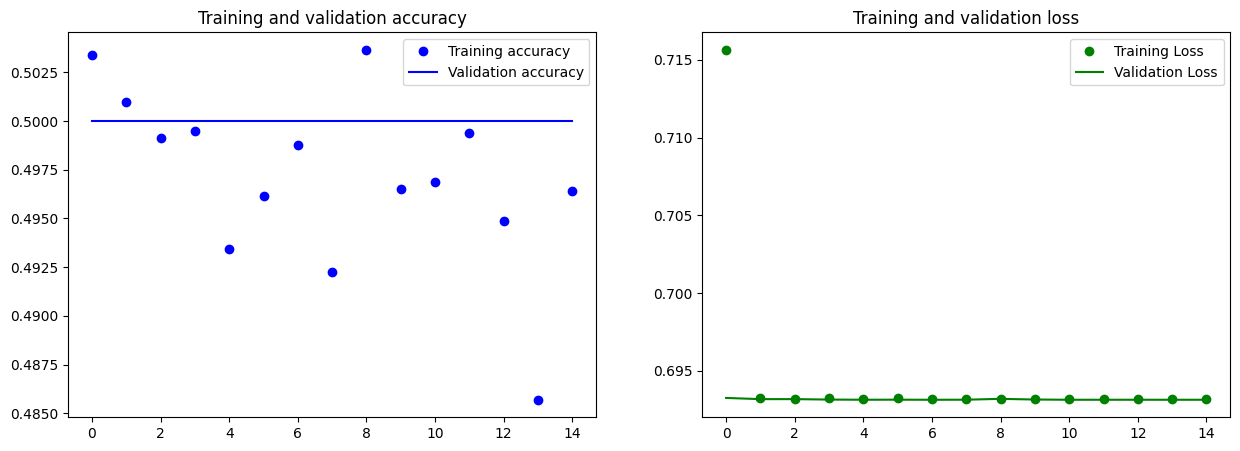

In [54]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# USING SVM

## DATA PREPROCESSING 

In [55]:

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_dataframe(train, x_col="image_path",
                                                     y_col="target",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_dataframe(test, x_col="image_path",
                                                     y_col="target",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))
cnn.summary()

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          9248    

In [56]:
Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
625/625 [==============================] - 56s 87ms/step - loss: 0.8423 - accuracy: 0.5969 - val_loss: 0.6692 - val_accuracy: 0.7148
Epoch 2/20
625/625 [==============================] - 54s 87ms/step - loss: 0.6589 - accuracy: 0.6865 - val_loss: 0.5880 - val_accuracy: 0.7484
Epoch 3/20
625/625 [==============================] - 54s 87ms/step - loss: 0.6012 - accuracy: 0.7163 - val_loss: 0.5427 - val_accuracy: 0.7220
Epoch 4/20
625/625 [==============================] - 54s 87ms/step - loss: 0.5560 - accuracy: 0.7394 - val_loss: 0.4911 - val_accuracy: 0.7908
Epoch 5/20
625/625 [==============================] - 54s 87ms/step - loss: 0.5241 - accuracy: 0.7535 - val_loss: 0.5402 - val_accuracy: 0.7996
Epoch 6/20
625/625 [==============================] - 55s 88ms/step - loss: 0.4972 - accuracy: 0.7685 - val_loss: 0.5059 - val_accuracy: 0.8128
Epoch 7/20
625/625 [==============================] - 55s 88ms/step - loss: 0.4800 - accuracy: 0.7757 - val_loss: 0.4564 - val_accuracy:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

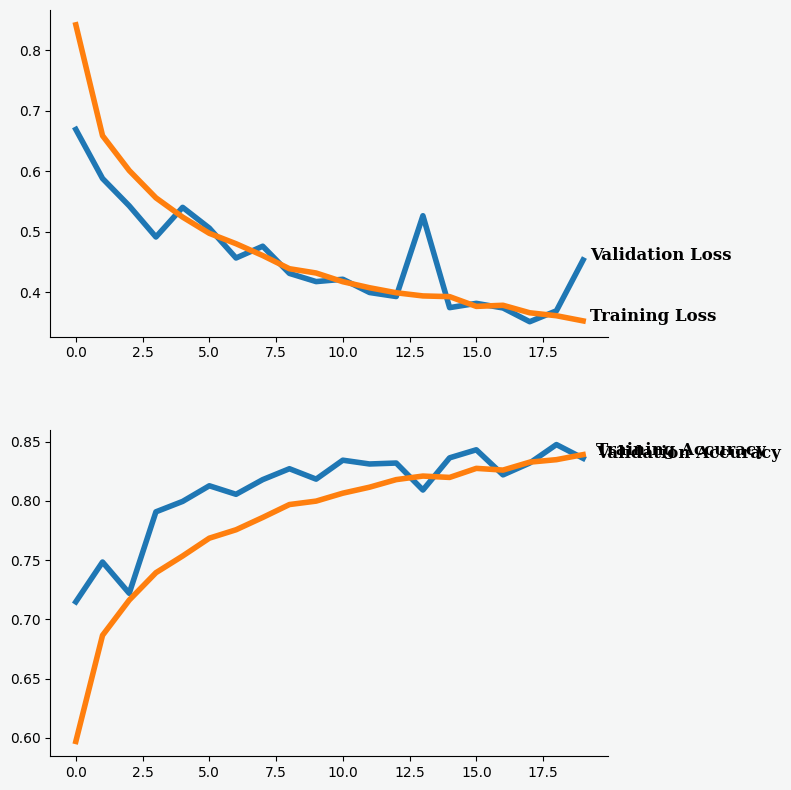

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming r.history contains your metrics data

fig, ax = plt.subplots(2, 1, figsize=(8, 8), dpi=100)
fig.patch.set_facecolor('#f5f6f6')

axes = ax.ravel()

# Replace infinite values with NaN
for key in ['val_loss', 'loss', 'val_accuracy', 'accuracy']:
    hist1[key] = np.where(np.isfinite(hist1[key]), hist1[key], np.nan)

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)

Epochs = range(len(hist1['loss']))

# Loss plot
sns.lineplot(x=Epochs, y=hist1['val_loss'], ax=axes[0], linewidth=4)
sns.lineplot(x=Epochs, y=hist1['loss'], ax=axes[0], linewidth=4)

axes[0].text(Epochs[-1] + 0.25, hist1['val_loss'][-1], 'Validation Loss', {'fontfamily': 'serif', 'size': 12, 'weight': 'bold', 'color': "black"})
axes[0].text(Epochs[-1] + 0.25, hist1['loss'][-1], 'Training Loss', {'fontfamily': 'serif', 'size': 12, 'weight': 'bold', 'color': "black"})

# Accuracy plot
sns.lineplot(x=Epochs, y=hist1['val_accuracy'], ax=axes[1], linewidth=4)
sns.lineplot(x=Epochs, y=hist1['accuracy'], ax=axes[1], linewidth=4)
axes[1].text(Epochs[-1] + 0.50, hist1['val_accuracy'][-1], 'Validation Accuracy', {'fontfamily': 'serif', 'size': 12, 'weight': 'bold', 'color': "black"})
axes[1].text(Epochs[-1] + 0.50, hist1['accuracy'][-1], 'Training Accuracy', {'fontfamily': 'serif', 'size': 12, 'weight': 'bold', 'color': "black"})

plt.tight_layout(h_pad=5)
plt.show()
